In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import LabelEncoder

### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

-  Some pre-requisites to use Machine learning are having the data ready and clean and enough descriptive analysis done to understand the problem.Only then can the business identify opportunities for machine learning.

- If ML is fed incorrect or poor quality data, the output will be of the same low quality. It is important to make sure that data availability and quality aspects are top notch before pursuing machine learning.

- The business problem and hence the target variable is critical. When the outcome is not directly observed, an in-depth analysis needs to be done before the model is built. Then, the business teams have to be involved in the definition phase, and apply their field expertise to shape the target variable definition.

- In short, an sufficient infrastructure is needed for machine learning.

- Source:datacamp

### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

In [2]:
df = pd.read_csv("loans_full_schema.csv")
org_df = df.copy()
df.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
emp_title,global config engineer,warehouse office clerk,assembly,customer service,security supervisor,NaN,hr,police,parts,4th person,...,medical director,teacher,program director,service advisor,da coordinator,owner,director,toolmaker,manager,operations analyst
emp_length,3,10,3,1,10,NaN,10,10,10,3,...,4,10,5,0,1,10,8,10,1,3
state,NJ,HI,WI,PA,CA,KY,MI,AZ,NV,IL,...,NJ,MA,NY,NC,WA,TX,PA,CT,WI,CT
homeownership,MORTGAGE,RENT,RENT,RENT,RENT,OWN,MORTGAGE,MORTGAGE,MORTGAGE,RENT,...,OWN,MORTGAGE,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_income,90000,40000,40000,30000,35000,34000,35000,110000,65000,30000,...,96774,75000,70000,20000,40000,108000,121000,67000,80000,66000
verified_income,Verified,Not Verified,Source Verified,Not Verified,Verified,Not Verified,Source Verified,Source Verified,Source Verified,Not Verified,...,Source Verified,Source Verified,Not Verified,Source Verified,Not Verified,Source Verified,Verified,Verified,Source Verified,Not Verified
debt_to_income,18.01,5.04,21.15,10.16,57.96,6.46,23.66,16.19,36.48,18.91,...,0.04,28.45,15.31,23.23,12.07,22.28,32.38,45.26,11.99,20.82
annual_income_joint,NaN,NaN,NaN,NaN,57000,NaN,155000,NaN,NaN,NaN,...,NaN,210000,NaN,NaN,NaN,NaN,NaN,107000,NaN,NaN
verification_income_joint,NaN,NaN,NaN,NaN,Verified,NaN,Not Verified,NaN,NaN,NaN,...,NaN,Source Verified,NaN,NaN,NaN,NaN,NaN,Source Verified,NaN,NaN
debt_to_income_joint,NaN,NaN,NaN,NaN,37.66,NaN,13.12,NaN,NaN,NaN,...,NaN,23.46,NaN,NaN,NaN,NaN,NaN,29.57,NaN,NaN


In [3]:
df.isna().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [4]:
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [6]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [7]:
for column in df:
    if df[column].dtypes == "O":
        print(column)
        print(df[column].unique())

emp_title
['global config engineer ' 'warehouse office clerk' 'assembly' ...
 'inspector/packer' 'da coordinator ' 'toolmaker']
state
['NJ' 'HI' 'WI' 'PA' 'CA' 'KY' 'MI' 'AZ' 'NV' 'IL' 'FL' 'SC' 'CO' 'TN'
 'TX' 'VA' 'NY' 'GA' 'MO' 'AR' 'MD' 'NC' 'NE' 'WV' 'NH' 'UT' 'DE' 'MA'
 'OR' 'OH' 'OK' 'SD' 'MN' 'AL' 'WY' 'LA' 'IN' 'KS' 'MS' 'WA' 'ME' 'VT'
 'CT' 'NM' 'AK' 'MT' 'RI' 'ND' 'DC' 'ID']
homeownership
['MORTGAGE' 'RENT' 'OWN']
verified_income
['Verified' 'Not Verified' 'Source Verified']
verification_income_joint
[nan 'Verified' 'Not Verified' 'Source Verified']
loan_purpose
['moving' 'debt_consolidation' 'other' 'credit_card' 'home_improvement'
 'medical' 'house' 'small_business' 'car' 'major_purchase' 'vacation'
 'renewable_energy']
application_type
['individual' 'joint']
grade
['C' 'D' 'A' 'B' 'F' 'E' 'G']
sub_grade
['C3' 'C1' 'D1' 'A3' 'C2' 'B5' 'C4' 'B2' 'B1' 'D3' 'F1' 'E5' 'A2' 'A5'
 'A4' 'A1' 'D4' 'D5' 'B3' 'D2' 'E1' 'G1' 'B4' 'C5' 'E2' 'E4' 'F3' 'E3'
 'F5' 'F2' 'F4' 'G4']
issue_m

In [8]:
df.duplicated(keep='first').value_counts()

False    10000
dtype: int64

# Handle missing data

### Mean imputation with numerical values

In [9]:
# Impute the missing values with mean imputation
df.fillna(df.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
print(df.isnull().sum())

emp_title                            833
emp_length                             0
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                         0
annual_income_joint                    0
verification_income_joint           8545
debt_to_income_joint                   0
delinq_2y                              0
months_since_last_delinq               0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late                  0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

### Mode imputation with categorical values and drop column 

In [10]:
# Iterate over each column of df
for col in df:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        if col != "emp_title": # too many unique values 
        # Impute with the most frequent value
            df = df.fillna(df[col].value_counts().index[0])
df.drop('emp_title', axis=1, inplace=True) 
# Count the number of NaNs in the dataset and print the counts to verify
print(df.isnull().sum())

emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
annual_income_joint                 0
verification_income_joint           0
debt_to_income_joint                0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
months_since_90d_late               0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts

# One-Hot encoding

In [11]:
df["homeownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [12]:
# homeownership - Categorical values to numerical 
df = pd.concat([df,pd.get_dummies(df['homeownership'], prefix='homeownership',dummy_na=False)],axis=1).drop(['homeownership'],axis=1)

In [13]:
#df.drop('homeownership_nan', axis=1, inplace=True) 
df.head(2)

,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,...,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT
0,3.0,NJ,90000.0,Verified,18.01,127914.571244,CA,19.979304,0,38.000000,...,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,1,0,0
1,10.0,HI,40000.0,Not Verified,5.04,127914.571244,CA,19.979304,0,36.760709,...,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0,0,1


# Label Encoder

In [14]:
# Instantiate LabelEncoder
le = LabelEncoder()
# Iterate over all the values of each column and extract their dtypes
for col in df:
    # Compare if the dtype is object
    if df[col].dtypes =='object' and col not in "state":
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])
df.head(5)

,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,...,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT
0,3.0,NJ,90000.0,2,18.01,127914.571244,0,19.979304,0,38.000000,...,1,0,27015.86,1999.33,984.14,1015.19,0.0,1,0,0
1,10.0,HI,40000.0,0,5.04,127914.571244,0,19.979304,0,36.760709,...,1,0,4651.37,499.12,348.63,150.49,0.0,0,0,1
2,3.0,WI,40000.0,1,21.15,127914.571244,0,19.979304,0,28.000000,...,0,0,1824.63,281.80,175.37,106.43,0.0,0,0,1
3,1.0,PA,30000.0,0,10.16,127914.571244,0,19.979304,0,36.760709,...,1,0,18853.26,3312.89,2746.74,566.15,0.0,0,0,1
4,10.0,CA,35000.0,2,57.96,57000.000000,3,37.660000,0,36.760709,...,1,0,21430.15,2324.65,1569.85,754.80,0.0,0,0,1


## 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [16]:
#domain knowledge
loan_df = df[['annual_income','loan_amount', 'term', 'total_credit_limit',
       'interest_rate', 'installment', 'initial_listing_status', 'disbursement_method',
       'balance', 'paid_total', 'paid_principal', 'paid_interest',
       'paid_late_fees']]
loan_df.head()

,annual_income,loan_amount,term,total_credit_limit,interest_rate,installment,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,90000.0,28000,60,70795,14.07,652.53,1,0,27015.86,1999.33,984.14,1015.19,0.0
1,40000.0,5000,36,28800,12.61,167.54,1,0,4651.37,499.12,348.63,150.49,0.0
2,40000.0,2000,36,24193,17.09,71.40,0,0,1824.63,281.80,175.37,106.43,0.0
3,30000.0,21600,36,25400,6.72,664.19,1,0,18853.26,3312.89,2746.74,566.15,0.0
4,35000.0,23000,36,69839,14.07,786.87,1,0,21430.15,2324.65,1569.85,754.80,0.0


<AxesSubplot:>

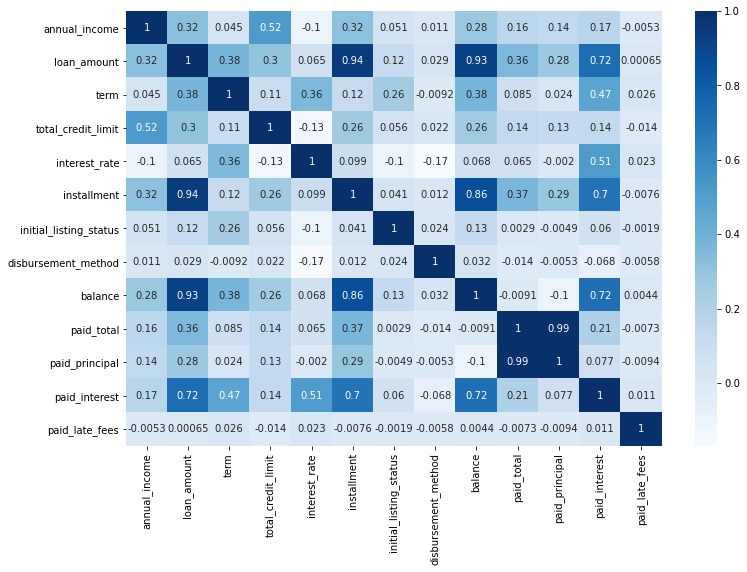

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan_df.corr(), annot=True, cmap='Blues')

Multicollinearity generally occurs when there are high correlations between two or more dependent or predictor variables. In other words, one predictor variable can be used to predict the other. For example, paid_principle and paid_total (0.99) , loan_amount and installment (0.94) , balance and loan amount (0.93), balance and installment (0.86). These multicolinear features can create redundant information, skewing the results in a regression model. As for other supervised models, multicolinear does not affect the performance.

Features with correlation between 0.3 to 0.75 would be best for model like interest_rate and paid_interest,term and paid_interest, balance and term.

## 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

In [36]:
bins = int(np.ceil(np.log2(len(df["loan_amount"]))) + 1)
bins

15

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

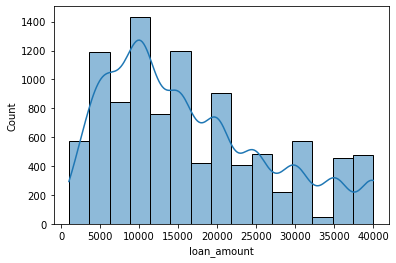

In [38]:
sns.histplot(x="loan_amount",data=df,kde=True,bins=bins)
plt.title

- Bin size was selected using Sturges' Rule : k = log2n + 1
- The highest peak of the distribution is at 10000
- The highest number of loan were taken for less than 15000 loan amount

## 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

### Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

In [19]:
df["state"].unique()

array(['NJ', 'HI', 'WI', 'PA', 'CA', 'KY', 'MI', 'AZ', 'NV', 'IL', 'FL',
       'SC', 'CO', 'TN', 'TX', 'VA', 'NY', 'GA', 'MO', 'AR', 'MD', 'NC',
       'NE', 'WV', 'NH', 'UT', 'DE', 'MA', 'OR', 'OH', 'OK', 'SD', 'MN',
       'AL', 'WY', 'LA', 'IN', 'KS', 'MS', 'WA', 'ME', 'VT', 'CT', 'NM',
       'AK', 'MT', 'RI', 'ND', 'DC', 'ID'], dtype=object)

In [20]:
northeast = ['ME', 'MA', 'RI', 'CT', 'NH', 'VT', 'NY', 'PA', 'NJ', 'DE', 'MD','DC'] 
pacific = ['CO', 'WY', 'MT', 'ID', 'WA', 'OR', 'UT', 'CA', 'AL', 'HI','NV']
south = ['WV', 'VA', 'KY', 'TN', 'NC', 'SC', 'GA', 'AL', 'MS', 'AK', 'LA', 'FL','TX', 'OK', 'NM', 'AZ', 'AR']
plains = ['IA','MO','NE','KS']
midwest = ['OH', 'IN', 'MI', 'IL', 'WI', 'MN', 'SD', 'ND']
def regions(row):
    if row['state'] in northeast:
        return 'Northeast'
    elif row['state'] in south:
        return 'South'   
    elif row['state'] in midwest:
        return 'Midwest'
    elif row['state'] in pacific:
        return 'Pacific'
    else:
        return 'Plains'
    
df['region'] = df.apply(lambda row: regions(row), axis =1)
df.sample(5)

,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,...,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,region
6343,0.000000,FL,32000.0,2,31.43,127914.571244,0,19.979304,0,37.000000,...,0,3491.33,613.51,508.67,104.84,0.0,0,0,1,South
2366,10.000000,TN,72828.0,2,35.11,127914.571244,0,19.979304,0,36.760709,...,0,3864.69,416.74,285.31,131.43,0.0,1,0,0,South
6038,5.930306,FL,48000.0,0,3.18,127914.571244,0,19.979304,0,36.760709,...,0,4623.95,463.47,376.05,87.42,0.0,0,1,0,South
577,2.000000,WA,63000.0,0,33.62,127914.571244,0,19.979304,0,36.760709,...,1,17147.14,2568.25,1727.86,840.39,0.0,1,0,0,Pacific
1820,9.000000,CA,68000.0,0,13.06,127914.571244,0,19.979304,0,36.760709,...,1,11755.73,1692.32,1244.27,448.05,0.0,0,0,1,Pacific


### a.	Is there a better way to do this than with a lambda? 

In [21]:
conditions = [df['state'].isin(northeast),
             df['state'].isin(south),
             df['state'].isin(midwest),
             df['state'].isin(pacific),
             df['state'].isin(plains)]
output = ['Northeast','South','Midwest','Pacific','Plains']
df['region_1'] = np.select(conditions,output)
df.sample(5)

,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,...,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT,region,region_1
3557,10.000000,NM,80000.0,1,22.95,127914.571244,0,19.979304,0,36.760709,...,12204.46,2127.37,1795.54,331.83,0.0,0,1,0,South,South
7026,5.930306,NY,15000.0,2,21.04,127914.571244,0,19.979304,0,36.760709,...,2788.90,294.87,211.10,83.77,0.0,0,0,1,Northeast,Northeast
6940,10.000000,AZ,109000.0,0,9.90,127914.571244,0,19.979304,0,48.000000,...,36229.06,5286.92,3770.94,1515.98,0.0,1,0,0,South,South
9591,5.930306,MD,35000.0,0,23.15,127914.571244,0,19.979304,2,14.000000,...,4627.27,467.56,372.73,94.83,0.0,0,0,1,Northeast,Northeast
7620,10.000000,AZ,63700.0,2,35.44,127914.571244,0,19.979304,0,36.760709,...,18495.86,1853.82,1504.14,349.68,0.0,1,0,0,South,South


In [22]:
region_loans = df.groupby('region')['loan_amount'].value_counts()
reg_loan_df = pd.DataFrame(region_loans)
reg_loan_df.rename(columns={"loan_amount": "loan_count"},inplace=True)
reg_loan_df.reset_index(inplace=True)
reg_loan_df

,region,loan_amount,loan_count
0,Midwest,10000,128
1,Midwest,20000,93
2,Midwest,15000,91
3,Midwest,40000,69
4,Midwest,12000,64
...,...,...,...
1125,South,39000,1
1126,South,39275,1
1127,South,39400,1
1128,South,39425,1


## 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

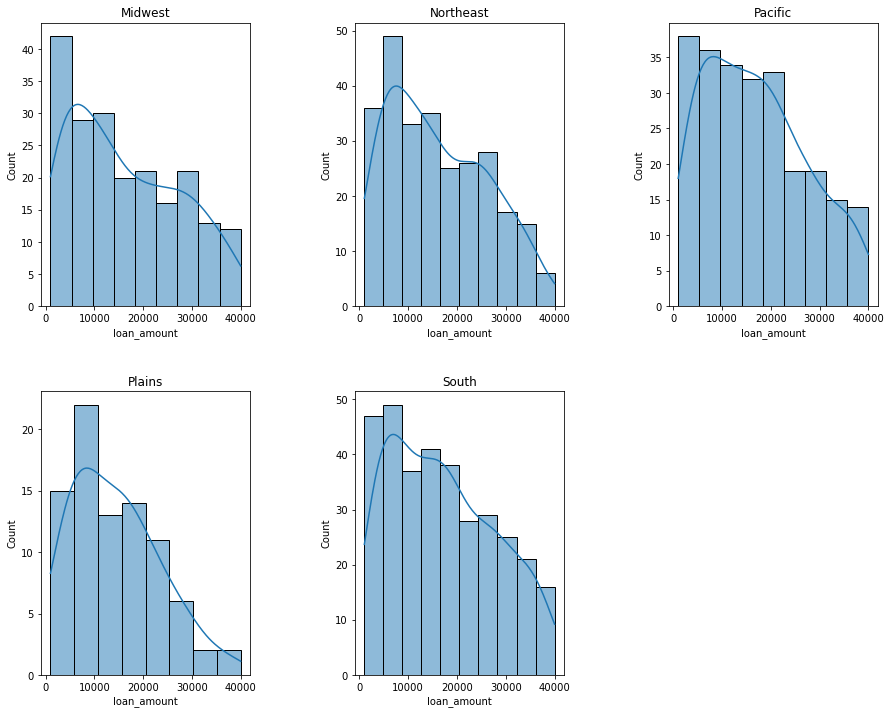

In [40]:
counter = 1
plt.figure(figsize = (15, 12))
for region in reg_loan_df["region"].unique():
    plt.subplot(2, 3, counter)
    bins = int(np.ceil(np.log2(len(reg_loan_df[reg_loan_df["region"]==region]["loan_amount"]))) + 1)
    ax = sns.histplot(x="loan_amount",data=reg_loan_df[reg_loan_df["region"]==region],kde=True,bins=bins)
    counter += 1
    ax.set_title(region)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

The distribution of each region is right skewed. The highest number of loans are for loan amounts less than 10000.
The lowest number of loans are for loan amount greater than 30000.

## 7. Questions
Is it necessary to pursue masters to get Data Science or Machine Learning related jobs?

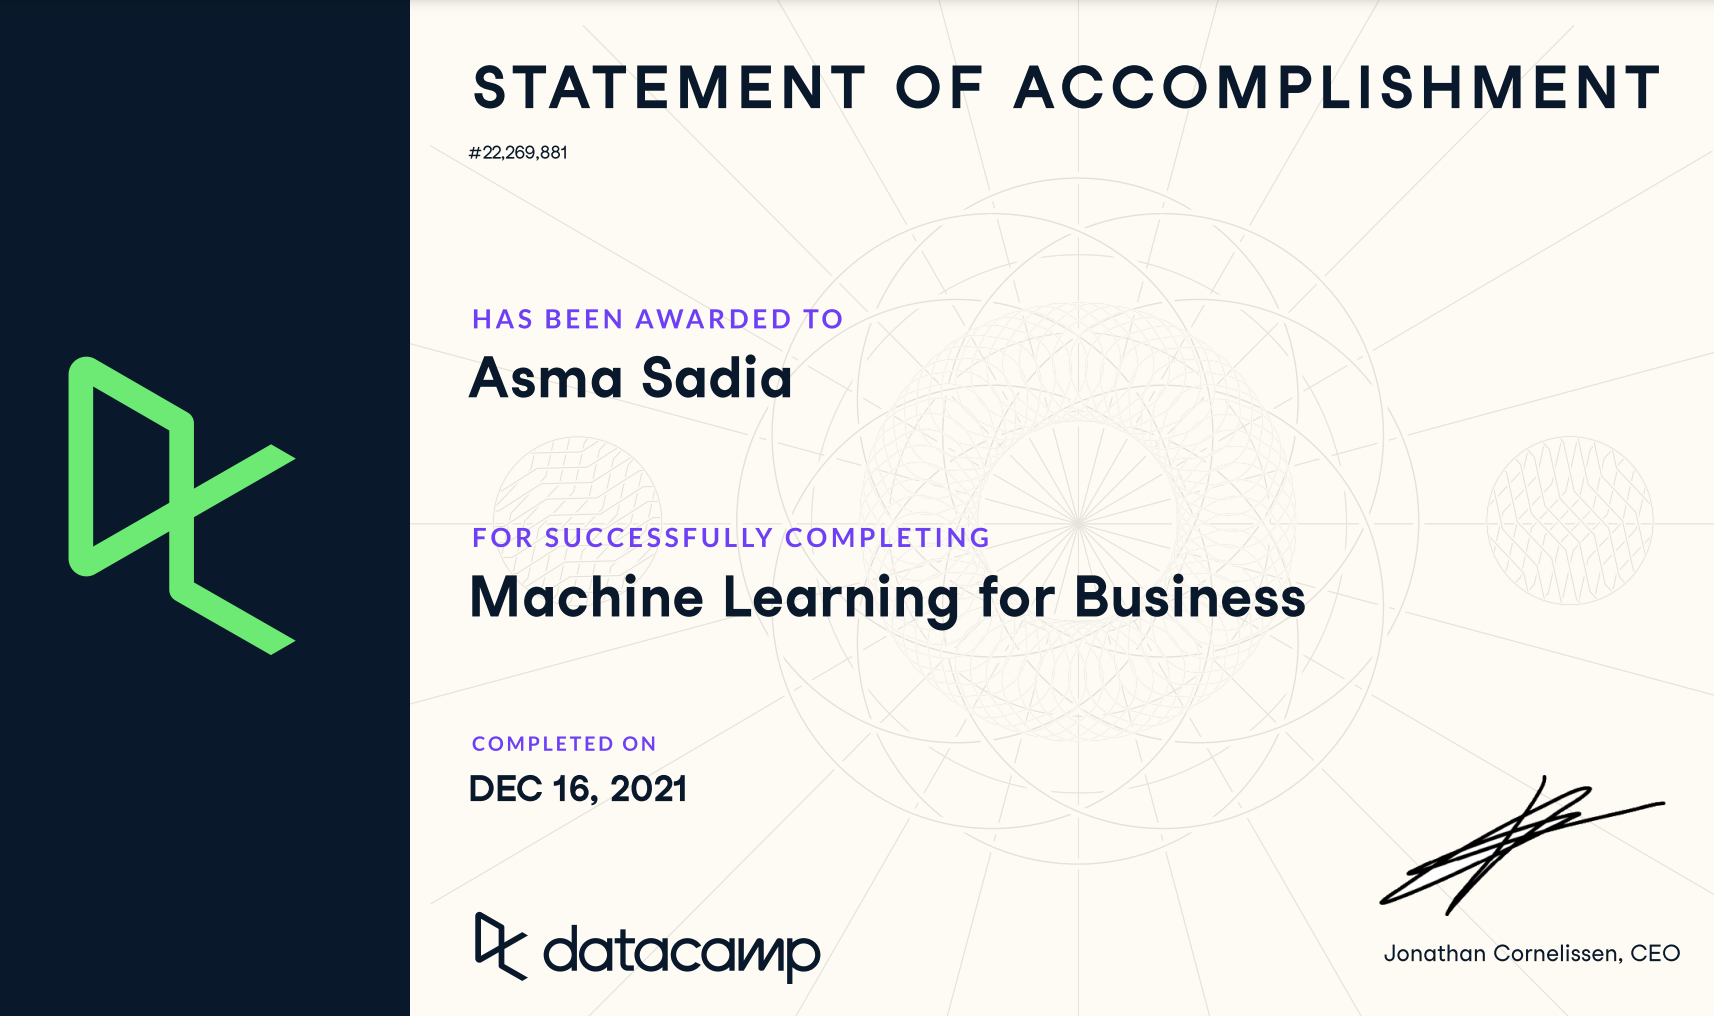

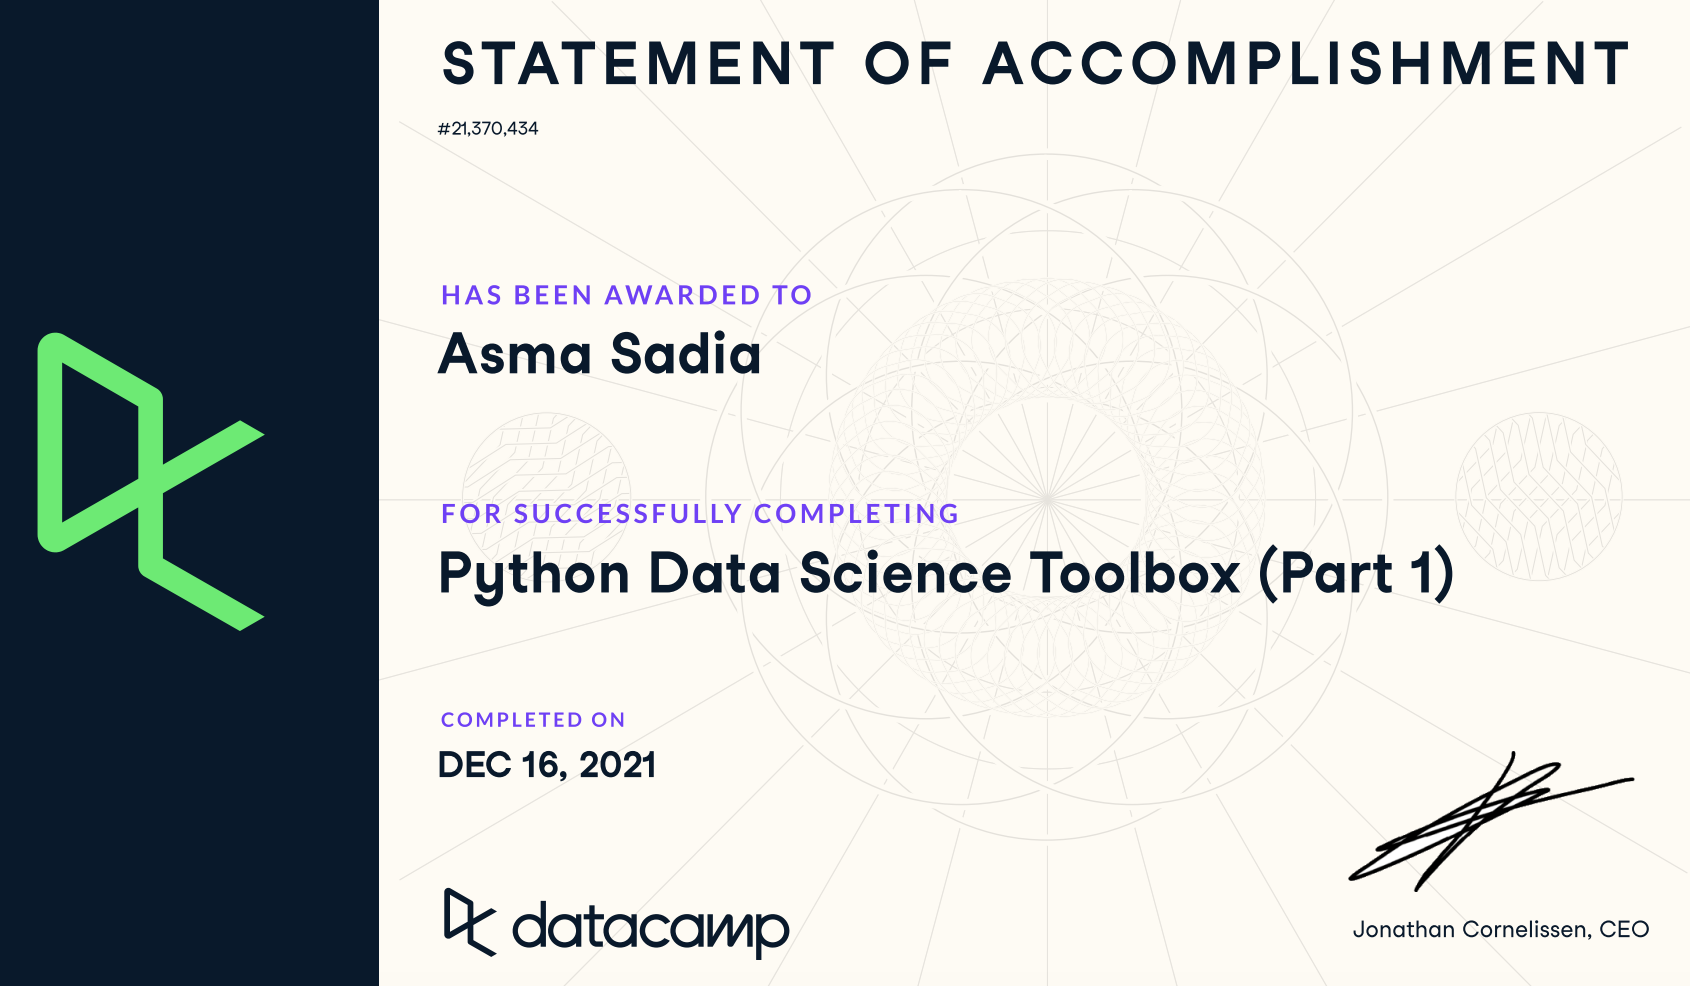